# 检查异常值

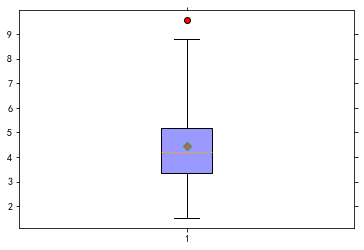

In [169]:
import os 
import pandas as pd 
path_2020='./covid_19_migration_2020/datas/clean_BDQXDate/'
for i in os.listdir(path_2020):
    print(i)    #数据里面的省份文件夹
    for j in os.listdir(path_2020+i):
        print(j)    #省份里面的城市文件x.csv
        df=pd.read_csv(path_2020+i+'./'+j,encoding='gbk')
        break
    break

import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
# 绘图：年龄箱线图  
plt.boxplot(x = df.cityin, # 指定绘图数据  
whis=2.2,#1.5倍的四分位值  
patch_artist=True, # 要求用自定义颜色填充盒形图，默认白色填充  
showmeans=True, # 以点的形式显示均值  
boxprops = {'color':'black','facecolor':'#9999ff'}, # 设置箱体属性，填充色和边框色  
flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # 设置异常值属性，点的形状、填充色和边框色  
meanprops = {'marker':'D','markerfacecolor':'indianred'}, # 设置均值点的属性，点的形状、填充色  
medianprops = {'linestyle':'--','color':'orange'}) # 设置中位数线的属性，线的类型和颜色  
# 去除箱线图的上边框与右边框的刻度标签  
plt.tick_params(top='off', right='off')  
# 显示图形  
plt.show()  

# 检测到异常值置为 nan
def box_plot_outliers(s):
    q1, q3 = s.quantile(.25), s.quantile(.75)
    iqr = q3 - q1
    low, up = q1 - 2.2*iqr, q3 + 2.2*iqr
    outlier = s.mask((s<low) | (s>up))
    return outlier
# 删除异常值填补数据
df1=df.copy()

df1.loc[:,['cityin','cityto','incity']]=df1.loc[:,['cityin','cityto','incity']].apply(box_plot_outliers)

print(df1[['cityin','cityto','incity']].isnull().sum())
try:
    df1['date'] =  pd.to_datetime(df1['date'])            #转换日期格式 
except:
    pass
df1=df1.set_index('date')                   #建立日期索引
df1= df1.resample('D').interpolate('linear')         #按天线性插值填补数据
print(df1[['cityin','cityto','incity']].isnull().sum())

# 画图：国家

In [23]:
######################合并所有省份然后生成国家的csv文件############################################
import pandas as pd 
path2020='./datas/province_2020.csv'
path2021='./datas/province_2021.csv'
df2020=pd.read_csv(path2020,encoding='gbk')
df2021=pd.read_csv(path2021,encoding='gbk')
##########################################2020.csv#########################################################
#一共有多少个省num
num=len(df2020.province.unique())
###合并日期相同的数据
def ab(df):
    return sum(df.values)/num
    
df = df2020[['date','cityin','cityto','incity']].groupby('date').apply(ab)
##########用列表提取数据
cityin=[]
cityto=[]
incity=[]
for i in df:
    cityin.append(i[0])
    cityto.append(i[1])
    incity.append(i[2])
date=df.index.to_list()
#########导出country.csv
df=pd.DataFrame([date,cityin,cityto,incity]).T
df.columns=['date','cityin','cityto','incity']
df.to_csv('./datas/country2020.csv',index=None)


#########################################2021.csv########################################################## 
#一共有多少个省num
num=len(df2021.province.unique())
###合并日期相同的数据
def ab(df):
    return sum(df.values)/num
   
df = df2021[['date','cityin','cityto','incity']].groupby('date').apply(ab)
##########用列表提取数据
cityin=[]
cityto=[]
incity=[]
for i in df:
    cityin.append(i[0])
    cityto.append(i[1])
    incity.append(i[2])
date=df.index.to_list()
#########导出country.csv
df=pd.DataFrame([date,cityin,cityto,incity]).T
df.columns=['date','cityin','cityto','incity']
df.to_csv('./datas/country2021.csv',index=None)

## 国家活动强度折线图

In [56]:
import os 
import pandas as pd 
from matplotlib.pyplot import MultipleLocator #从pyplot导入MultipleLocator类，这个类用于设置刻度间隔
if not os.path.exists('./draw_picture'):
    os.mkdir('./draw_picture')
if not os.path.exists('./draw_picture/country'):
    os.mkdir('./draw_picture/country')
import matplotlib.pyplot as plt #导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
path0='./datas/country2020.csv'
path1='./datas/country2021.csv'
df0=pd.read_csv(path0)
df1=pd.read_csv(path1)
df1=df1.iloc[:len(df0),:] #把2021年和2020年保持一样的时间范围

In [57]:
def pic_country(df0,df1,i,n):
    #########################活动强度折线图#############################################
    if n=='cityin':
        n1='Immigration'
    elif n=='cityto':
        n1='Emmigration'
    else:
        n1='Inside'
    plt.figure(figsize=(12,8))
    color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
    plt.plot(df0[n],label='2020', linewidth=2)
    plt.plot(df1[n],label='2021', linewidth=2)
    plt.title('Country Human {} Activity Intensity'.format(n1),fontsize=20)
    
    # 设置刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Date',fontsize=20)
    #设置x轴标签及其字号
    plt.ylabel('Activity Intensity',fontsize=20)
    #设置y轴标签及其字号

    x_major_locator=MultipleLocator(30)
    #把x轴的刻度间隔设置为1，并存在变量里
    # y_major_locator=MultipleLocator(0.2)
    # #把y轴的刻度间隔设置为10，并存在变量里
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为1的倍数
    # ax.yaxis.set_major_locator(y_major_locator)
    # #把y轴的主刻度设置为10的倍数
    ax.set_xticks([0,30,60,90,120])
    ax.set_xticklabels(['1-Jan','1-Feb','1-Mar','1-Apr','1-May'])
    
    maxlen=df0[n].describe()['max'] if df0[n].describe()['max']>df1[n].describe()['max'] else df1[n].describe()['max']
    minlen=df0[n].describe()['min'] if df0[n].describe()['min']<df1[n].describe()['min'] else df1[n].describe()['min']

    plt.plot([22, 22], [0, maxlen], c=color_sequence[14], linestyle='--',label='Wuhan Lockdown') # 2021年1月22日
    
    plt.plot([47, 47], [0, maxlen], c=color_sequence[12], linestyle='--',label='After the Spring Festival') # 2021年2月17日
    
    plt.plot([56, 56], [0, maxlen], c=color_sequence[11], linestyle='--',label='Lantern Festival') # 2021年2月26日

    plt.plot([92, 92], [0, maxlen], c=color_sequence[10], linestyle='--',label='Ching Ming Festival') # 2021年4月3日
    
    plt.ylim(0,maxlen)
    plt.grid(axis='both',linestyle='dotted',color='b',alpha=.3) #, 
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["right"].set_alpha(0.0) 
    plt.legend(fontsize=12,loc='best')
    plt.savefig('./draw_picture/country/'+i+'_'+n+'_line.jpg')
    #plt.show()
    plt.close()

In [58]:
for n in ['cityin','cityto','incity']:
    pic_country(df0,df1,'country',n)
    
print('----输出完毕所有国家的活动强度折线图----')

----输出完毕所有国家的活动强度折线图----


# 画图：区域

## 区域活动强度折线图

In [59]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt #导入图像库
from matplotlib.pyplot import MultipleLocator #从pyplot导入MultipleLocator类，这个类用于设置刻度间隔
if not os.path.exists('./draw_picture/area'):
    os.mkdir('./draw_picture/area')
path2020='./datas/area_2020.csv'
path2021='./datas/area_2021.csv'
df2020=pd.read_csv(path2020,encoding='gbk')
df2021=pd.read_csv(path2021,encoding='gbk')

In [60]:
def pic_area(df0,df1,i,n):
    #########################活动强度折线图#############################################
    if n=='cityin':
        n1='Immigration'
    elif n=='cityto':
        n1='Emmigration'
    else:
        n1='Inside'
    plt.figure(figsize=(12,8))
    color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
    plt.plot(df0[n],label='2020', linewidth=2)
    plt.plot(df1[n],label='2021', linewidth=2)
    plt.title('Area Human {} Activity Intensity'.format(n1),fontsize=20)
    
    # 设置刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Date',fontsize=20)
    #设置x轴标签及其字号
    plt.ylabel('Activity Intensity',fontsize=20)
    #设置y轴标签及其字号

    x_major_locator=MultipleLocator(30)
    #把x轴的刻度间隔设置为1，并存在变量里
    # y_major_locator=MultipleLocator(0.2)
    # #把y轴的刻度间隔设置为10，并存在变量里
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为1的倍数
    # ax.yaxis.set_major_locator(y_major_locator)
    # #把y轴的主刻度设置为10的倍数
    ax.set_xticks([0,30,60,90,120])
    ax.set_xticklabels(['1-Jan','1-Feb','1-Mar','1-Apr','1-May'])
    
    maxlen=df0[n].describe()['max'] if df0[n].describe()['max']>df1[n].describe()['max'] else df1[n].describe()['max']
    minlen=df0[n].describe()['min'] if df0[n].describe()['min']<df1[n].describe()['min'] else df1[n].describe()['min']

    plt.plot([22, 22], [0, maxlen], c=color_sequence[14], linestyle='--',label='Wuhan Lockdown') # 2021年1月22日
    
    plt.plot([47, 47], [0, maxlen], c=color_sequence[12], linestyle='--',label='After the Spring Festival') # 2021年2月17日
    
    plt.plot([56, 56], [0, maxlen], c=color_sequence[11], linestyle='--',label='Lantern Festival') # 2021年2月26日

    plt.plot([92, 92], [0, maxlen], c=color_sequence[10], linestyle='--',label='Ching Ming Festival') # 2021年4月3日
    
    plt.ylim(0,maxlen)
    plt.grid(axis='both',linestyle='dotted',color='b',alpha=.3) #, 
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["right"].set_alpha(0.0) 
    plt.legend(fontsize=12,loc='best')
    plt.savefig('./draw_picture/area/'+i+'_'+n+'_line.jpg')
    #plt.show()
    plt.close()

In [61]:
for i in df2020.area.unique():
    df0=df2020[df2020.area==i]
    df1=df2021[df2021.area==i]
    df1=df1.iloc[:len(df0),:] #把2021年和2020年保持一样的时间范围
    #####重置索引
    df0=df0.reset_index(drop=True)
    df1=df1.reset_index(drop=True)
    #######
    pic_area(df0,df1,i,'cityin')
    pic_area(df0,df1,i,'cityto')
    pic_area(df0,df1,i,'incity')
print('----输出完毕所有地区的活动强度折线图----')

----输出完毕所有地区的活动强度折线图----


# 画图：省份

## 省份活动强度折线图

In [62]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt #导入图像库
from matplotlib.pyplot import MultipleLocator #从pyplot导入MultipleLocator类，这个类用于设置刻度间隔
if not os.path.exists('./draw_picture/province'):
    os.mkdir('./draw_picture/province')
path2020='./datas/province_2020.csv'
path2021='./datas/province_2021.csv'
df2020=pd.read_csv(path2020,encoding='gbk')
df2021=pd.read_csv(path2021,encoding='gbk')

In [63]:
def pic_province(df0,df1,i,n):
    #########################活动强度折线图#############################################
    if n=='cityin':
        n1='Immigration'
    elif n=='cityto':
        n1='Emmigration'
    else:
        n1='Inside'
    plt.figure(figsize=(12,8))
    color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
    plt.plot(df0[n],label='2020', linewidth=2)
    plt.plot(df1[n],label='2021', linewidth=2)
    plt.title('Province Human {} Activity Intensity'.format(n1),fontsize=20)
    
    # 设置刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Date',fontsize=20)
    #设置x轴标签及其字号
    plt.ylabel('Activity Intensity',fontsize=20)
    #设置y轴标签及其字号

    x_major_locator=MultipleLocator(30)
    #把x轴的刻度间隔设置为1，并存在变量里
    # y_major_locator=MultipleLocator(0.2)
    # #把y轴的刻度间隔设置为10，并存在变量里
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为1的倍数
    # ax.yaxis.set_major_locator(y_major_locator)
    # #把y轴的主刻度设置为10的倍数
    ax.set_xticks([0,30,60,90,120])
    ax.set_xticklabels(['1-Jan','1-Feb','1-Mar','1-Apr','1-May'])
    
    maxlen=df0[n].describe()['max'] if df0[n].describe()['max']>df1[n].describe()['max'] else df1[n].describe()['max']
    minlen=df0[n].describe()['min'] if df0[n].describe()['min']<df1[n].describe()['min'] else df1[n].describe()['min']

    plt.plot([22, 22], [0, maxlen], c=color_sequence[14], linestyle='--',label='Wuhan Lockdown') # 2021年1月22日
    
    plt.plot([47, 47], [0, maxlen], c=color_sequence[12], linestyle='--',label='After the Spring Festival') # 2021年2月17日
    
    plt.plot([56, 56], [0, maxlen], c=color_sequence[11], linestyle='--',label='Lantern Festival') # 2021年2月26日

    plt.plot([92, 92], [0, maxlen], c=color_sequence[10], linestyle='--',label='Ching Ming Festival') # 2021年4月3日
    try:
        plt.ylim(0,maxlen)
    except:
        print(maxlen)
    plt.grid(axis='both',linestyle='dotted',color='b',alpha=.3) #, 
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["right"].set_alpha(0.0) 
    plt.legend(fontsize=12,loc='best')
    plt.savefig('./draw_picture/province/'+i+'_'+n+'_line.jpg')
    #plt.show()
    plt.close()

In [64]:
for i in df2020.province.unique():
    df0=df2020[df2020.province==i]
    df1=df2021[df2021.province==i]
    df1=df1.iloc[:len(df0),:] #把2021年和2020年保持一样的时间范围
    #####重置索引
    df0=df0.reset_index(drop=True)
    df1=df1.reset_index(drop=True)
    #######
    pic_province(df0,df1,i,'cityin')
    pic_province(df0,df1,i,'cityto')
    pic_province(df0,df1,i,'incity')
print('----输出完毕所有省份的活动强度折线图----')

nan
nan
nan
----输出完毕所有省份的活动强度折线图----


## 以武汉市为例的省份迁徙活动迁徙强度

In [81]:
#########################################2020###################################
###########获取省份包含城市的字典
import os 
import pandas as  pd 
path2020='./covid_19_migration_2020/datas/clean_BDQXDate/'
dist={}
for i in os.listdir(path2020):
    path2020_pro=path2020+i 
    lis=[]
    for j in  os.listdir(path2020_pro):
        j=j[:-4]    #去掉.csv
        lis.append(j)
    dist[i]=lis
#dist

#通过字典的value获取字典的key
def get_key(d, value):
    return [k for k,v in d.items() if value in v]


###########获取武汉市的数据
import os 
import pandas as  pd 
path2020='./covid_19_migration_2020/datas/clean_BDQXDate/'
for i in os.listdir(path2020):
    if i !='湖北':
        continue
    path2020_province=path2020+i 
    for j in  os.listdir(path2020_province):
        if j !='武汉.csv':
            continue
        path2020_city=path2020_province+'./'+j 
        df2020=pd.read_csv(path2020_city,encoding='gbk')
#df2020        

df2020_new=df2020[['date','incity']]
for i in df2020.columns:
    j=i
    if i in ['date','incity','cityin','cityto']:
        continue
    #去掉武汉市那列的数据
    if i[:2]=='武汉':
        continue
    #修正一些匹配不上当饿地区
    if i[:-4]=='神农架林区':
        j='神农架地区'+i[-4:]
    if i[:-4]=='海东市':
        j='海东地区'+i[-4:]
    if i[:-4]=='博尔塔拉蒙古自治州':
        j='博尔塔拉州'+i[-4:]
#     if i[:-4]=='楚雄彝族自治州':
#         j='楚雄州'+i[-4:]
#     if i[:-4]=='湘西土家族苗族自治州':
#         j='湘西州'+i[-4:]
    province=get_key(dist,j[:2])    #通过字典的value获取字典的key
    if province ==[]:
        province=get_key(dist,j[:3]) 
        if province ==[]:
            province=get_key(dist,j[:4]) 
            if province ==[]:
                province=get_key(dist,j[:5]) 
                if province ==[]:
                    province=get_key(dist,j[:6]) 
                    if province ==[]:
                        province=get_key(dist,j[:7]) 
                        if province ==[]:
                            province=get_key(dist,j[:8]) 
                            if province ==[]:
                                province=get_key(dist,j[:9]) 
                                if province ==[]:
                                    province=get_key(dist,j[:10]) 
                                    if province ==[]:
                                        province=get_key(dist,j[:11]) 
                                        if province ==[]:
                                            province=get_key(dist,j[:2]+j[-5:-4]) 
    if province !=[]:
        province=i[-4:-2]+province[0]
        try:
            df2020_new[province]+=df2020[i]
        except:
            df2020_new[province]=df2020[i].tolist()
    else:
        print(i)
df2020_new=df2020_new.drop('incity',axis=1)
df2020_new.to_csv('./datas/wuhan2020.csv',encoding='gbk',index=0)

{'上海': ['上海'],
 '云南': ['临沧',
  '丽江',
  '保山',
  '大理州',
  '德宏州',
  '怒江州',
  '文山',
  '昆明',
  '昭通',
  '普洱',
  '曲靖',
  '楚雄州',
  '玉溪',
  '红河州',
  '西双版纳傣族自治州',
  '迪庆州'],
 '内蒙古': ['乌兰察布',
  '乌海',
  '兴安盟',
  '包头',
  '呼伦贝尔',
  '呼和浩特',
  '巴彦淖尔',
  '赤峰',
  '通辽',
  '鄂尔多斯',
  '锡林郭勒盟',
  '阿拉善盟'],
 '北京': ['北京'],
 '吉林': ['吉林市', '四平', '延边', '松原', '白城', '白山', '辽源', '通化', '长春'],
 '四川': ['乐山',
  '内江',
  '凉山州',
  '南充',
  '宜宾',
  '巴中',
  '广元',
  '广安',
  '德阳',
  '成都',
  '攀枝花',
  '泸州',
  '甘孜州',
  '眉山',
  '绵阳',
  '自贡',
  '资阳',
  '达州',
  '遂宁',
  '阿坝州',
  '雅安'],
 '宁夏': ['中卫', '吴忠', '固原', '石嘴山', '银川'],
 '安徽': ['亳州',
  '六安',
  '合肥',
  '安庆',
  '宣城',
  '宿州',
  '池州',
  '淮北',
  '淮南',
  '滁州',
  '芜湖',
  '蚌埠',
  '铜陵',
  '阜阳',
  '马鞍山',
  '黄山'],
 '山东': ['东营',
  '临沂',
  '威海',
  '德州',
  '日照',
  '枣庄',
  '泰安',
  '济南',
  '济宁',
  '淄博',
  '滨州',
  '潍坊',
  '烟台',
  '聊城',
  '菏泽',
  '青岛'],
 '山西': ['临汾', '吕梁', '大同', '太原', '忻州', '晋中', '晋城', '朔州', '运城', '长治', '阳泉'],
 '广东': ['东莞',
  '中山',
  '云浮',
  '佛山',
  '广州',
  '惠州',
  '揭阳',
  '梅州',
  '

In [116]:
#########################################2021###################################
###########获取省份包含城市的字典
import os 
import pandas as  pd 
path2021='./covid_19_migration_2021/datas/clean_BDQXDate/'
dist={}
for i in os.listdir(path2021):
    path2021_pro=path2021+i 
    lis=[]
    for j in  os.listdir(path2021_pro):
        j=j[:-4]    #去掉.csv
        lis.append(j)
    dist[i]=lis
#dist

#通过字典的value获取字典的key
def get_key(d, value):
    return [k for k,v in d.items() if value in v]


###########获取武汉市的数据
import os 
import pandas as  pd 
path2021='./covid_19_migration_2021/datas/clean_BDQXDate/'
for i in os.listdir(path2021):
    if i !='湖北':
        continue
    path2021_province=path2021+i 
    for j in  os.listdir(path2021_province):
        if j !='武汉.csv':
            continue
        path2021_city=path2021_province+'./'+j 
        df2021=pd.read_csv(path2021_city,encoding='gbk')
#df2021        

df2021_new=df2021[['date','incity']]
for i in df2021.columns:
    j=i
    if i in ['date','incity','cityin','cityto']:
        continue
    #去掉武汉市那列的数据
    if i[:2]=='武汉':
        continue
    #修正一些匹配不上的地区
    if i[:-4]=='神农架林区':
        j='神农架地区'+i[-4:]
    if i[:-4]=='海东市':
        j='海东地区'+i[-4:]
    if i[:-4]=='博尔塔拉蒙古自治州':
        j='博尔塔拉州'+i[-4:]
    province=get_key(dist,j[:2])    #通过字典的value获取字典的key
    if province ==[]:
        province=get_key(dist,j[:3]) 
        if province ==[]:
            province=get_key(dist,j[:4]) 
            if province ==[]:
                province=get_key(dist,j[:5]) 
                if province ==[]:
                    province=get_key(dist,j[:6]) 
                    if province ==[]:
                        province=get_key(dist,j[:7]) 
                        if province ==[]:
                            province=get_key(dist,j[:8]) 
                            if province ==[]:
                                province=get_key(dist,j[:9]) 
                                if province ==[]:
                                    province=get_key(dist,j[:10]) 
                                    if province ==[]:
                                        province=get_key(dist,j[:11]) 
                                        if province ==[]:
                                            province=get_key(dist,j[:2]+j[-5:-4]) 
    if province !=[]:
        province=i[-4:-2]+province[0]
        try:
            df2021_new[province]+=df2021[i]
        except:
            df2021_new[province]=df2021[i].tolist()
    else:
        print(i)
df2021_new=df2021_new.drop('incity',axis=1)
df2021_new.to_csv('./datas/wuhan2021.csv',encoding='gbk',index=0)

date.1


<ipython-input-116-4a619a2166c1>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021_new[province]=df2021[i].tolist()
<ipython-input-116-4a619a2166c1>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021_new[province]+=df2021[i]


In [190]:
#######################################画柱状图##################################################
import pandas as pd 
df2020=pd.read_csv('./datas/wuhan2020.csv',encoding='gbk')
#把迁入的省份放入一个列表中，把迁出省份放入一个列表中
inlist=[]
tolist=[]
namelist=[]
for i in df2020.columns:
    if i[:2]=='迁入':
        inlist.append(i)
        namelist.append(i[2:])
for i in inlist:
    tolist.append('迁出'+i[2:])
        
df2021=pd.read_csv('./datas/wuhan2021.csv',encoding='gbk')
#把迁入的省份放入一个列表中，把迁出省份放入一个列表中
inlist1=[]
tolist1=[]
namelist1=[]

for i in df2021.columns:
    if i[:2]=='迁入':
        inlist1.append(i)
        namelist1.append(i[2:])
for i in inlist1:
    tolist1.append('迁出'+i[2:])


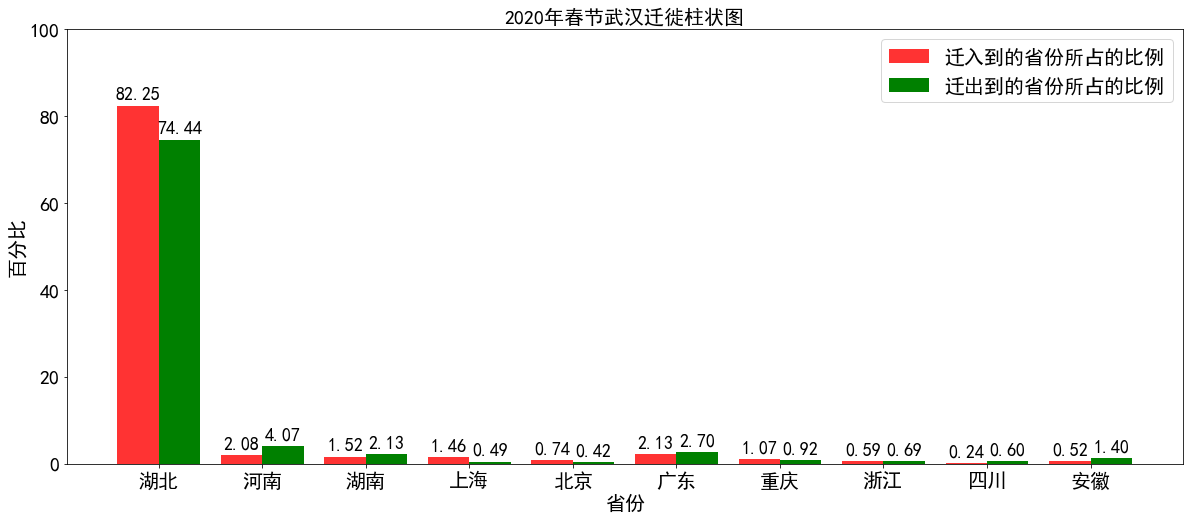

In [197]:
#2020年的春节是1月25日
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,8))
label_list = namelist[:10]    # 横坐标刻度显示值
num_list1 = df2020[df2020['date']=='2020-01-25'][inlist].values.tolist()[0][:10]      # 纵坐标值1
num_list2 = df2020[df2020['date']=='2020-01-25'][tolist].values.tolist()[0][:10]      # 纵坐标值2
x = list(range(len(num_list1)))
"""
绘制条形图
left:长条形中点横坐标
height:长条形高度
width:长条形宽度，默认值0.8
label:为后面设置legend准备
"""
rects1 = plt.bar(x=x, height=num_list1, width=0.4, alpha=0.8, color='red', label="迁入到的省份所占的比例")
rects2 = plt.bar(x=[i + 0.4 for i in x], height=num_list2, width=0.4, color='green', label="迁出到的省份所占的比例")
plt.ylabel("百分比",fontsize=20)
"""
设置x轴刻度显示值
参数一：中点坐标
参数二：显示值
"""
plt.xticks([index + 0.2 for index in x], label_list,fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,100) #设置y轴的标尺
plt.xlabel("省份",fontsize=20)
plt.title("2020年春节武汉迁徙柱状图",fontsize=20)
plt.legend(fontsize=20)     # 设置题注
# 编辑文本
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, '%.2f'%float(height), ha="center", va="bottom",fontsize=18)
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, '%.2f'%float(height), ha="center", va="bottom",fontsize=18)

plt.savefig('./draw_picture/2020年春节武汉迁徙柱状图.jpg')
plt.show()


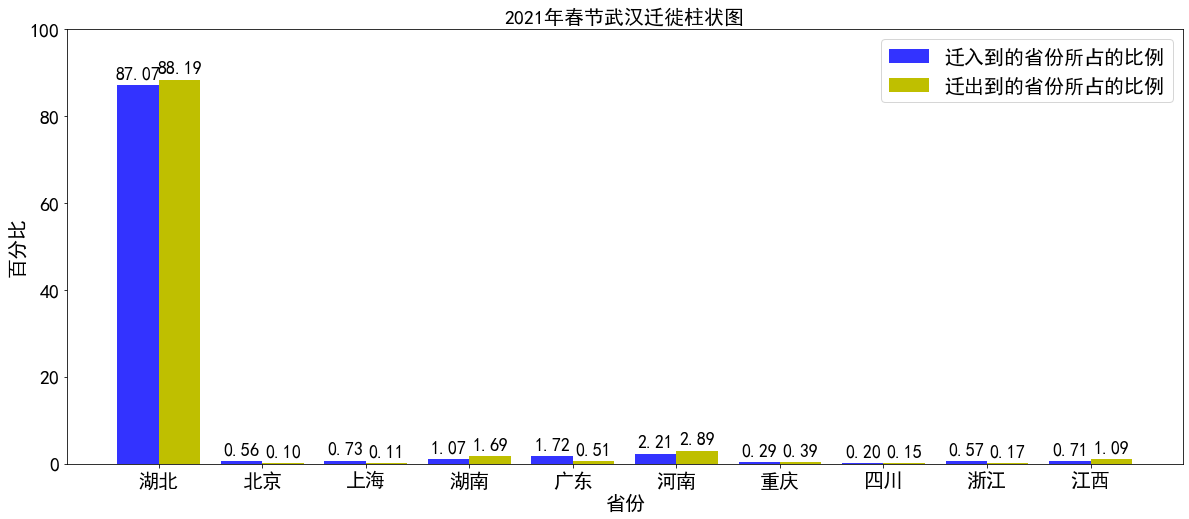

In [198]:
#2021年春节是2月12日
import matplotlib.pyplot as plt
import matplotlib
# 设置中文字体和负号正常显示
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20,8))
label_list = namelist1[:10]    # 横坐标刻度显示值
num_list1 = df2021[df2021['date']=='2021-02-12'][inlist1].values.tolist()[0][:10]      # 纵坐标值1
num_list2 = df2021[df2021['date']=='2021-02-12'][tolist1].values.tolist()[0][:10]      # 纵坐标值2
x = list(range(len(num_list1)))
"""
绘制条形图
left:长条形中点横坐标
height:长条形高度
width:长条形宽度，默认值0.8
label:为后面设置legend准备
"""
rects1 = plt.bar(x=x, height=num_list1, width=0.4, alpha=0.8, color='b', label="迁入到的省份所占的比例")
rects2 = plt.bar(x=[i + 0.4 for i in x], height=num_list2, width=0.4, color='y', label="迁出到的省份所占的比例")
plt.ylabel("百分比",fontsize=20)
"""
设置x轴刻度显示值
参数一：中点坐标
参数二：显示值
"""
plt.xticks([index + 0.2 for index in x], label_list,fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,100) #设置y轴的标尺
plt.xlabel("省份",fontsize=20)
plt.title("2021年春节武汉迁徙柱状图",fontsize=20)
plt.legend(fontsize=20)     # 设置题注
# 编辑文本
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, '%.2f'%float(height), ha="center", va="bottom",fontsize=18)
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height+1, '%.2f'%float(height), ha="center", va="bottom",fontsize=18)
    
plt.savefig('./draw_picture/2021年春节武汉迁徙柱状图.jpg')
plt.show()


# 画图：城市

## 城市活动强度折线图

In [65]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt #导入图像库
from matplotlib.pyplot import MultipleLocator #从pyplot导入MultipleLocator类，这个类用于设置刻度间隔
if not os.path.exists('./draw_picture/city'):
    os.mkdir('./draw_picture/city')

In [66]:
def pic_city(df0,df1,i,n):
    #########################活动强度折线图#############################################
    if n=='cityin':
        n1='Immigration'
    elif n=='cityto':
        n1='Emmigration'
    else:
        n1='Inside'
    plt.figure(figsize=(12,8))
    color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
    plt.plot(df0[n],label='2020', linewidth=2)
    plt.plot(df1[n],label='2021', linewidth=2)
    plt.title('City Human {} Activity Intensity'.format(n1),fontsize=20)
    
    # 设置刻度字体大小
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Date',fontsize=20)
    #设置x轴标签及其字号
    plt.ylabel('Activity Intensity',fontsize=20)
    #设置y轴标签及其字号

    x_major_locator=MultipleLocator(30)
    #把x轴的刻度间隔设置为1，并存在变量里
    # y_major_locator=MultipleLocator(0.2)
    # #把y轴的刻度间隔设置为10，并存在变量里
    ax=plt.gca()
    #ax为两条坐标轴的实例
    ax.xaxis.set_major_locator(x_major_locator)
    #把x轴的主刻度设置为1的倍数
    # ax.yaxis.set_major_locator(y_major_locator)
    # #把y轴的主刻度设置为10的倍数
    ax.set_xticks([0,30,60,90,120])
    ax.set_xticklabels(['1-Jan','1-Feb','1-Mar','1-Apr','1-May'])
    
    maxlen=df0[n].describe()['max'] if df0[n].describe()['max']>df1[n].describe()['max'] else df1[n].describe()['max']
    minlen=df0[n].describe()['min'] if df0[n].describe()['min']<df1[n].describe()['min'] else df1[n].describe()['min']

    plt.plot([22, 22], [0, maxlen], c=color_sequence[14], linestyle='--',label='Wuhan Lockdown') # 2020年1月22日
    
    plt.plot([47, 47], [0, maxlen], c=color_sequence[12], linestyle='--',label='After the Spring Festival') # 2021年2月17日
    
    plt.plot([56, 56], [0, maxlen], c=color_sequence[11], linestyle='--',label='Lantern Festival') # 2021年2月26日

    plt.plot([92, 92], [0, maxlen], c=color_sequence[10], linestyle='--',label='Ching Ming Festival') # 2021年4月3日
    
    plt.ylim(0,maxlen)
    plt.grid(axis='both',linestyle='dotted',color='b',alpha=.3) #, 
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["right"].set_alpha(0.0) 
    plt.legend(fontsize=12,loc='best')
    plt.savefig('./draw_picture/city/'+i+'_'+n+'_line.jpg')
    #plt.show()
    plt.close()

In [67]:
path2020='./covid_19_migration_2020/datas/clean_BDQXDate/'
path2021='./covid_19_migration_2021/datas/clean_BDQXDate/'
for i in os.listdir(path2020):
    for j in os.listdir(path2020+i):
        path0=path2020+i+'/'+j
        path1=path2021+i+'/'+j
        df0=pd.read_csv(path0,encoding='gbk')
        df1=pd.read_csv(path1,encoding='gbk')
        df1=df1.iloc[:len(df0),:] #把2021年和2020年保持一样的时间范围
        pic_city(df0,df1,j[:-4],'cityin')
        pic_city(df0,df1,j[:-4],'cityto')
        pic_city(df0,df1,j[:-4],'incity')
print('----输出完毕所有城市的活动强度折线图----')

----输出完毕所有城市的活动强度折线图----
